In [1]:
import numpy as np
import gseapy
from scipy.sparse import csr_matrix
from tqdm.contrib.concurrent import process_map
from functools import partial
from scipy.sparse.csgraph import shortest_path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import networkx

path_to_abca7 = '/home/gridsan/djuna/homer/github/ABCA7lof2'
import sys
sys.path.append(path_to_abca7)

from ABCA7lof2.geneclusters import get_scores, get_kernighan_lin_clusters, get_gene_pathway_matrix, get_full_matrix_from_bipartite, plot_component, plot_edges, plot_nodes, group, compute_groupped_matrix, get_scores, find_similar_clusters, get_representative_name_per_cluster, get_kernighan_lin_clusters, get_gene_pathway_matrix, compute_groupped_matrix, get_full_matrix_from_bipartite

In [2]:
frame = pd.read_csv('../supplementary_tables/data_s8.csv')

unique_clusters = np.unique(frame['cluster'])
cm = plt.cm.get_cmap('tab20')
colors = [cm(int(x)) for x in range(len(unique_clusters))]

/state/partition1/slurm_tmp/24642792.0.0/ipykernel_1553075/3859499087.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('tab20')


In [8]:
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274, 1.0),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 (1.0, 0.7333333333333333, 0.47058823529411764, 1.0),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353, 1.0),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
 (1.0, 0.596078431372549, 0.5882352941176471, 1.0)]

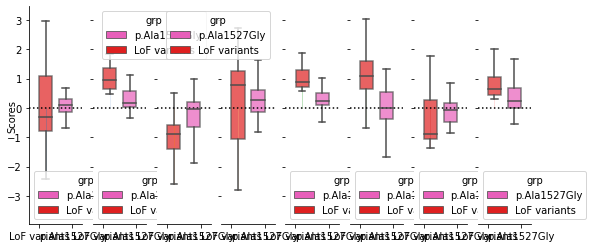

<Figure size 180x360 with 0 Axes>

<Figure size 180x360 with 0 Axes>

<Figure size 180x360 with 0 Axes>

<Figure size 180x360 with 0 Axes>

<Figure size 180x360 with 0 Axes>

<Figure size 180x360 with 0 Axes>

<Figure size 180x360 with 0 Axes>

<Figure size 180x360 with 0 Axes>

In [33]:
######## show common vs rare variant cluster perturbation patterns

scores = pd.read_csv('../processed_data/common_var/rs3752246_binary_scores.csv', index_col = 0)
scores['description'] = scores.index
temp = pd.merge(scores, frame, on = 'description')
temp['grp'] = 'p.Ala1527Gly'

# scores = pd.read_csv('../processed_data/common_var/ex_scoresE4.csv', index_col = 0)
# scores['description'] = scores.index
# temp1 = pd.merge(scores, frame, on = 'description')
# temp1['grp'] = 'E4'

scores = pd.read_csv('../processed_data/single_cell/all_scores_0825.csv', index_col=0)
scores = pd.DataFrame(scores['Ex'])
scores = scores.rename(columns={"Ex": "scores"})
scores['description'] = scores.index
temp2 = pd.merge(scores, frame, on = 'description')
temp2['grp'] = 'LoF variants'
TEMP = pd.concat((temp, temp2), axis=0)

fig, axes = plt.subplots(1,8, sharey=True, figsize=(9,4))
grp_colors = {
    'LoF variants': (1.0, 0.0, 0.0, 1.0),
    'p.Ala1527Gly': (1.0, 0.2824, 0.7608, 1.0)
}

for i in np.unique(TEMP['cluster']):
    plt.figure(figsize = (2.5,5))
    temp = TEMP[TEMP['cluster']==i]
    #temp['scores'] = np.abs(temp['scores'])
    boxplot = sns.boxplot(data = temp, x = 'grp', y='scores',hue='grp',palette=grp_colors, ax=axes[i], boxprops=dict(alpha=.7),flierprops=dict( marker='.', markersize=0 ), order=['LoF variants','p.Ala1527Gly'], orient='v')
    
    l1 = axes[i].lines[0]

    x1 = l1.get_xydata()[:, 0]
    y1 = l1.get_xydata()[:, 1]
    
    axes[i].spines[['right', 'top']].set_visible(False)
    
    if i>0:
        axes[i].spines[['left']].set_visible(False)

    #axes[i].set_title('cluster '+str(i), loc='left', y=.3, x=.05)
    #axes[i].axvline(np.mean(temp[i]), color=colors[i])#, linestyle='dotted')
    axes[i].axhline(0, color='black', linestyle='dotted')
    axes[i].fill_between(x1, y1, color=colors[i], alpha=0.3)
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')
    #axes[i].set_yticklabels([])

#     if i==7:
#         continue
#     axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right') 


     # Rotate x-axis labels

# Add common title for the y-axis
fig.text(0.1, 0.5, 'Scores', ha='center', va='center', rotation='vertical')

fig.savefig('../pdf_figures/common_var_clusters.pdf')

/state/partition1/slurm_tmp/24590389.0.0/ipykernel_1979419/3255035783.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')


IndexError: index 8 is out of bounds for axis 0 with size 8

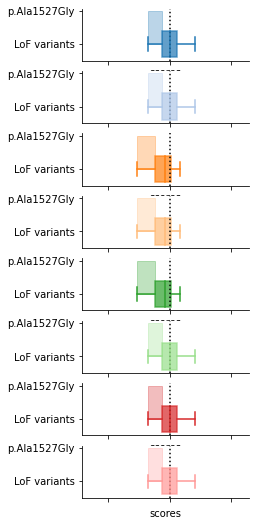

<Figure size 180x360 with 0 Axes>

<Figure size 180x360 with 0 Axes>

<Figure size 180x360 with 0 Axes>

<Figure size 180x360 with 0 Axes>

<Figure size 180x360 with 0 Axes>

<Figure size 180x360 with 0 Axes>

<Figure size 180x360 with 0 Axes>

<Figure size 180x360 with 0 Axes>

<Figure size 180x360 with 0 Axes>

In [24]:
###### show specific gset perturbation pattern for LOF

######## show common vs rare variant cluster perturbation patterns
frame = pd.read_csv('../processed_data/common_var/lipid_synthesis_gsets.csv')

scores = pd.read_csv('../processed_data/single_cell/all_scores_0825.csv', index_col=0)
scores = pd.DataFrame(scores['Ex'])
scores = scores.rename(columns={"Ex": "scores"})
scores['description'] = scores.index
temp2 = pd.merge(scores, frame, left_on= 'description', right_on = 'value')
temp2['grp'] = 'LoF variants'
TEMP = temp2

fig, axes = plt.subplots(8, 1, sharex=True, figsize=(3,9))

for i in np.unique(range(len(TEMP['Var1']))):
    plt.figure(figsize = (2.5,5))
    temp = TEMP[TEMP['Var1']==TEMP['Var1'][i]]
    #temp['scores'] = np.abs(temp['scores'])
    boxplot = sns.boxplot(data = temp, y = 'grp', x='scores', ax=axes[i],             boxprops=dict(alpha=.7,facecolor=colors[i], edgecolor=colors[i]), whiskerprops=dict(color=colors[i]),             medianprops=dict(color=colors[i]),
            capprops=dict(color=colors[i]),             flierprops=dict(markeredgecolor=colors[i], marker='.', markersize=0, markerfacecolor=colors[i], ), order=['p.Ala1527Gly', 'LoF variants'], orient='h')
    
    l1 = axes[i].lines[0]

    x1 = l1.get_xydata()[:, 0]
    y1 = l1.get_xydata()[:, 1]
    
    axes[i].spines[['right', 'top']].set_visible(False)
    axes[i].axvline(0, color='black', linestyle='dotted')
    axes[i].fill_between(x1, y1, color=colors[i], alpha=0.3)
    axes[i].set_ylabel('')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right') 


     # Rotate x-axis labels

# Add common title for the y-axis
fig.text(0.1, 0.5, 'Scores', ha='center', va='center', rotation='vertical')

#fig.savefig('../pdf_figures/common_var_clusters.pdf')

In [2]:
######## show common vs rare variant -specific pathway- perturbation patterns

frame = pd.read_csv('../processed_data/common_var/lipid_synthesis_gsets.csv')

scores = pd.read_csv('../processed_data/common_var/rs3752246_binary_scores.csv', index_col = 0)
scores['description'] = scores.index
temp = pd.merge(scores, frame, left_on = 'description', right_on='value')
temp['grp'] = 'p.Ala1527Gly'

scores = pd.read_csv('../processed_data/single_cell/all_scores_0825.csv', index_col=0)
scores = pd.DataFrame(scores['Ex'])
scores = scores.rename(columns={"Ex": "scores"})
scores['description'] = scores.index
temp2 = pd.merge(scores, frame, left_on = 'description', right_on='value')
temp2['grp'] = 'LoF variants'
TEMP = pd.concat((temp, temp2), axis=0)

In [3]:
TEMP

,scores,description,Unnamed: 0,Var1,Var2,value,grp
0,-2.217158,ELOVL5,27,Fatty Acyl-CoA Biosynthesis Homo sapiens R-HSA...,7,ELOVL5,p.Ala1527Gly
1,-2.217158,ELOVL5,195,Fatty Acyl-CoA Biosynthesis Homo sapiens R-HSA...,49,ELOVL5,p.Ala1527Gly
2,-2.217158,ELOVL5,363,Fatty Acyl-CoA Biosynthesis Homo sapiens R-HSA...,91,ELOVL5,p.Ala1527Gly
3,-2.217158,ELOVL5,531,Fatty Acyl-CoA Biosynthesis Homo sapiens R-HSA...,133,ELOVL5,p.Ala1527Gly
4,-1.885609,PPARD,508,response to lipid (GO:0033993),127,PPARD,p.Ala1527Gly
...,...,...,...,...,...,...,...
410,0.000000,SLC11A1,144,response to lipid (GO:0033993),36,SLC11A1,LoF variants
411,0.000000,IRAK1,408,response to lipid (GO:0033993),102,IRAK1,LoF variants
412,0.000000,IRAK3,404,response to lipid (GO:0033993),101,IRAK3,LoF variants
413,0.000000,LTBR,500,response to lipid (GO:0033993),125,LTBR,LoF variants


In [6]:
frame = temp2

/state/partition1/slurm_tmp/24590389.0.0/ipykernel_1979419/3883561615.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_frame.fillna(0, inplace=True)


ValueError: The number of observations cannot be determined on an empty distance matrix.

<Figure size 72x144 with 0 Axes>

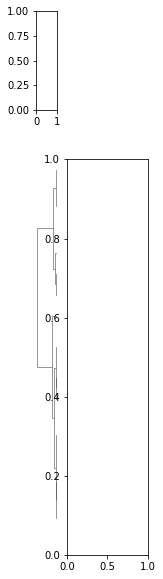

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming frame is your DataFrame
# frame = pd.read_csv('../processed_data/common_var/lipid_synthesis_gsets.csv')

# Create a pivot table for better visualization in the heatmap
pivot_frame = frame.pivot_table(index='description', columns='grp', values='scores')
filtered_frame = pivot_frame[(pivot_frame.abs() > 1.3).any(axis=1)]

filtered_frame.fillna(0, inplace=True)

# Create a heatmap
plt.figure(figsize=(1, 2))  # Adjust the figure size as needed
clustered_heatmap = sns.clustermap(filtered_frame, cmap='RdBu', annot=True, fmt='.2f', linewidths=.5, method='complete', center = 0, figsize=(2, 10))

# Add a title to the heatmap
plt.suptitle('Clustered Heatmap of Scores for Lipid Synthesis Gene Sets', y=1.02)

# Show the plot
plt.show()

Text(0.1, 0.5, 'Scores')

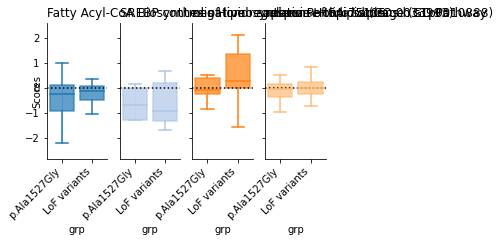

<Figure size 180x360 with 0 Axes>

<Figure size 180x360 with 0 Axes>

<Figure size 180x360 with 0 Axes>

<Figure size 180x360 with 0 Axes>

In [10]:


fig, axes = plt.subplots( 1,4, sharey=True, figsize=(5,2.5))

for i in range(len(np.unique(TEMP['Var1']))):
    plt.figure(figsize = (2.5,5))
    temp = TEMP[TEMP['Var1']==np.unique(TEMP['Var1'])[i]]
    #temp['scores'] = np.abs(temp['scores'])
    boxplot = sns.boxplot(data = temp, x = 'grp', y='scores', ax=axes[i],             boxprops=dict(alpha=.7,facecolor=colors[i], edgecolor=colors[i]), whiskerprops=dict(color=colors[i]),             medianprops=dict(color=colors[i]),
            capprops=dict(color=colors[i]), flierprops=dict(markeredgecolor=colors[i], marker='.', markersize=0, markerfacecolor=colors[i], ), order=['p.Ala1527Gly', 'LoF variants'], orient='v')
    
    l1 = axes[i].lines[0]

    x1 = l1.get_xydata()[:, 0]
    y1 = l1.get_xydata()[:, 1]
    
    axes[i].spines[['right', 'top']].set_visible(False)
    axes[i].set_title(np.unique(TEMP['Var1'])[i],loc='left')#, y=.3, x=.05)
    #axes[i].axvline(np.mean(temp[i]), color=colors[i])#, linestyle='dotted')
    axes[i].axhline(0, color='black', linestyle='dotted')
    axes[i].fill_between(x1, y1, color=colors[i], alpha=0.3)
    axes[i].set_ylabel('')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right') 


     # Rotate x-axis labels

# Add common title for the y-axis
fig.text(0.1, 0.5, 'Scores', ha='center', va='center', rotation='vertical')

#fig.savefig('../pdf_figures/common_var_clusters.pdf')

In [231]:
######## show common vs rare variant -specific pathway- perturbation patterns

#frame = pd.read_csv('../processed_data/common_var/fat_ox_gsets.csv')
frame = pd.read_csv('../processed_data/common_var/stress_ox_gsets.csv')

scores = pd.read_csv('../processed_data/common_var/rs3752246_binary_scores.csv', index_col = 0)
scores['description'] = scores.index
temp = pd.merge(scores, frame, left_on = 'description', right_on='value')
temp['grp'] = 'p.Ala1527Gly'

scores = pd.read_csv('../processed_data/single_cell/all_scores_0825.csv', index_col=0)
scores = pd.DataFrame(scores['Ex'])
scores = scores.rename(columns={"Ex": "scores"})
scores['description'] = scores.index
temp2 = pd.merge(scores, frame, left_on = 'description', right_on='value')
temp2['grp'] = 'LoF variants'
TEMP = pd.concat((temp, temp2), axis=0)

IndexError: index 4 is out of bounds for axis 0 with size 4

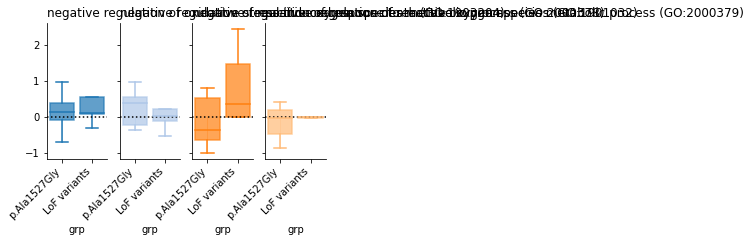

<Figure size 180x360 with 0 Axes>

<Figure size 180x360 with 0 Axes>

<Figure size 180x360 with 0 Axes>

<Figure size 180x360 with 0 Axes>

<Figure size 180x360 with 0 Axes>

In [232]:


fig, axes = plt.subplots( 1,4, sharey=True, figsize=(5,2.5))

for i in range(len(np.unique(TEMP['Var1']))):
    plt.figure(figsize = (2.5,5))
    temp = TEMP[TEMP['Var1']==np.unique(TEMP['Var1'])[i]]
    #temp['scores'] = np.abs(temp['scores'])
    boxplot = sns.boxplot(data = temp, x = 'grp', y='scores', ax=axes[i],             boxprops=dict(alpha=.7,facecolor=colors[i], edgecolor=colors[i]), whiskerprops=dict(color=colors[i]),             medianprops=dict(color=colors[i]),
            capprops=dict(color=colors[i]), flierprops=dict(markeredgecolor=colors[i], marker='.', markersize=0, markerfacecolor=colors[i], ), order=['p.Ala1527Gly', 'LoF variants'], orient='v')
    
    l1 = axes[i].lines[0]

    x1 = l1.get_xydata()[:, 0]
    y1 = l1.get_xydata()[:, 1]
    
    axes[i].spines[['right', 'top']].set_visible(False)
    axes[i].set_title(np.unique(TEMP['Var1'])[i],loc='left')#, y=.3, x=.05)
    #axes[i].axvline(np.mean(temp[i]), color=colors[i])#, linestyle='dotted')
    axes[i].axhline(0, color='black', linestyle='dotted')
    axes[i].fill_between(x1, y1, color=colors[i], alpha=0.3)
    axes[i].set_ylabel('')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right') 


     # Rotate x-axis labels

# Add common title for the y-axis
fig.text(0.1, 0.5, 'Scores', ha='center', va='center', rotation='vertical')

#fig.savefig('../pdf_figures/common_var_clusters.pdf')

In [233]:
######## show common vs rare variant -specific pathway- perturbation patterns

frame = pd.read_csv('../processed_data/common_var/stress_ox_gsets.csv')

scores = pd.read_csv('../processed_data/common_var/rs3752246_binary_scores.csv', index_col = 0)
scores['description'] = scores.index
temp = pd.merge(scores, frame, left_on = 'description', right_on='value')
temp['grp'] = 'p.Ala1527Gly'

scores = pd.read_csv('../processed_data/single_cell/all_scores_0825.csv', index_col=0)
scores = pd.DataFrame(scores['Ex'])
scores = scores.rename(columns={"Ex": "scores"})
scores['description'] = scores.index
temp2 = pd.merge(scores, frame, left_on = 'description', right_on='value')
temp2['grp'] = 'LoF variants'
TEMP = pd.concat((temp, temp2), axis=0)

In [234]:
frame = TEMP

/state/partition1/slurm_tmp/24587997.0.0/ipykernel_1948082/3883561615.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_frame.fillna(0, inplace=True)


<Figure size 72x144 with 0 Axes>

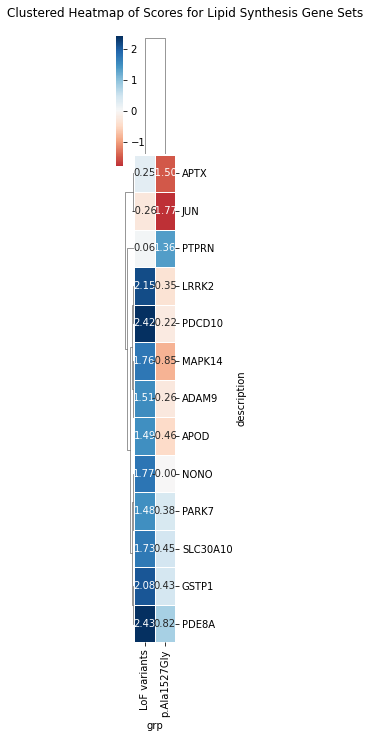

In [235]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming frame is your DataFrame
# frame = pd.read_csv('../processed_data/common_var/lipid_synthesis_gsets.csv')

# Create a pivot table for better visualization in the heatmap
pivot_frame = frame.pivot_table(index='description', columns='grp', values='scores')
filtered_frame = pivot_frame[(pivot_frame.abs() > 1.3).any(axis=1)]

filtered_frame.fillna(0, inplace=True)

# Create a heatmap
plt.figure(figsize=(1, 2))  # Adjust the figure size as needed
clustered_heatmap = sns.clustermap(filtered_frame, cmap='RdBu', annot=True, fmt='.2f', linewidths=.5, method='complete', center = 0, figsize=(2, 10))

# Add a title to the heatmap
plt.suptitle('Clustered Heatmap of Scores for Lipid Synthesis Gene Sets', y=1.02)

# Show the plot
plt.show()

/state/partition1/slurm_tmp/24587997.0.0/ipykernel_1948082/2755113676.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')


Text(0.1, 0.5, 'Scores')

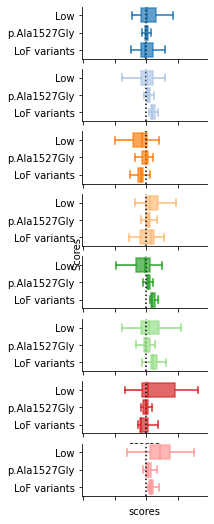

<Figure size 72x360 with 0 Axes>

<Figure size 72x360 with 0 Axes>

<Figure size 72x360 with 0 Axes>

<Figure size 72x360 with 0 Axes>

<Figure size 72x360 with 0 Axes>

<Figure size 72x360 with 0 Axes>

<Figure size 72x360 with 0 Axes>

<Figure size 72x360 with 0 Axes>

In [139]:
scores = pd.read_csv('../processed_data/common_var/exp_binary_scores.csv', index_col = 0)
scores['description'] = scores.index
temp = pd.merge(scores, frame, on = 'description')
temp['grp'] = 'Low'

scores = pd.read_csv('../processed_data/common_var/rs3752246_binary_scores.csv', index_col = 0)
scores['description'] = scores.index
temp1 = pd.merge(scores, frame, on = 'description')
temp1['grp'] = 'p.Ala1527Gly'

scores = pd.read_csv('../processed_data/single_cell/all_scores_0825.csv', index_col=0)
scores = pd.DataFrame(scores['Ex'])
scores = scores.rename(columns={"Ex": "scores"})
scores['description'] = scores.index
temp2 = pd.merge(scores, frame, on = 'description')
temp2['grp'] = 'LoF variants'
TEMP = pd.concat((temp, temp1, temp2), axis=0)

fig, axes = plt.subplots(8, 1, sharex=True, figsize=(2.25,9))

for i in np.unique(TEMP['cluster']):
    plt.figure(figsize = (1,5))
    temp = TEMP[TEMP['cluster']==i]
    #temp['scores'] = np.abs(temp['scores'])
    boxplot = sns.boxplot(data = temp, y = 'grp', x='scores',color=colors[i], ax=axes[i],             boxprops=dict(alpha=.7,facecolor=colors[i], edgecolor=colors[i]), whiskerprops=dict(color=colors[i]),             medianprops=dict(color=colors[i]),
            capprops=dict(color=colors[i]),             flierprops=dict(markeredgecolor=colors[i], marker='.', markersize=0, markerfacecolor=colors[i], ), order=['Low','p.Ala1527Gly', 'LoF variants'], orient='h')
    
    l1 = axes[i].lines[0]

    x1 = l1.get_xydata()[:, 0]
    y1 = l1.get_xydata()[:, 1]
    
    axes[i].spines[['right', 'top']].set_visible(False)
    #axes[i].set_title('cluster '+str(i), loc='left', y=.3, x=.05)
    #axes[i].axvline(np.mean(temp[i]), color=colors[i])#, linestyle='dotted')
    axes[i].axvline(0, color='black', linestyle='dotted')
    axes[i].fill_between(x1, y1, color=colors[i], alpha=0.3)
    axes[i].set_ylabel('')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right') 


     # Rotate x-axis labels

# Add common title for the y-axis
fig.text(0.1, 0.5, 'Scores', ha='center', va='center', rotation='vertical')

#fig.savefig('../pdf_figures/common_var_clusters.pdf')

Text(0.5, 0, 'scores')

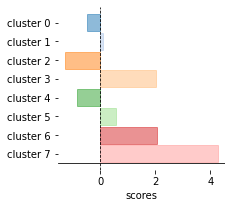

In [145]:
# barplot
temp = pd.read_csv('../processed_data/common_var/exp_cluster_effects.csv')

temp['score'] = np.sign(temp['NES']) * -np.log10(temp['pval'])
temp['cluster'] = ['cluster ' + str(x) for x in temp['pathway']]

plt.figure(figsize=(3,3))
index = np.argsort(-1*temp['pathway'])
temp = temp.loc[index]
#sns.barplot(data=temp, y='cluster', x='score', palette=colors, orient='h', order=temp['cluster'][np.argsort(temp['pathway'])], height=.2)
plt.barh(y=temp['cluster'], width=temp['score'], color=colors[::-1], height=.9, alpha=.5, edgecolor=colors[::-1])
plt.box(False)
plt.axvline(x=0, color='black', linestyle='--', label='Vertical Line',  linewidth=0.8)
plt.axhline(y=-0.5, color='black', linewidth=0.8)
plt.xlabel('scores')
#plt.savefig('../pdf_figures/common_var_bar.pdf')

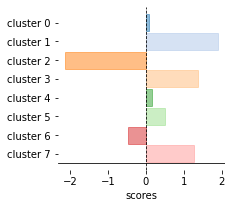

In [146]:
# barplot
temp = pd.read_csv('../processed_data/common_var/rs3755246_cluster_effects.csv')

temp['score'] = np.sign(temp['NES']) * -np.log10(temp['pval'])
temp['cluster'] = ['cluster ' + str(x) for x in temp['pathway']]

plt.figure(figsize=(3,3))
index = np.argsort(-1*temp['pathway'])
temp = temp.loc[index]
#sns.barplot(data=temp, y='cluster', x='score', palette=colors, orient='h', order=temp['cluster'][np.argsort(temp['pathway'])], height=.2)
plt.barh(y=temp['cluster'], width=temp['score'], color=colors[::-1], height=.9, alpha=.5, edgecolor=colors[::-1])
plt.box(False)
plt.axvline(x=0, color='black', linestyle='--', label='Vertical Line',  linewidth=0.8)
plt.axhline(y=-0.5, color='black', linewidth=0.8)
plt.xlabel('scores')
plt.savefig('../pdf_figures/common_var_bar.pdf')

In [147]:
temp

,Unnamed: 0,pathway,pval,padj,log2err,ES,NES,size,score,cluster
3,4,7,0.053047,0.106093,0.076608,0.455928,1.408364,40,1.275342,cluster 7
5,6,6,0.338596,0.451462,0.036511,-0.387688,-1.085840,18,-0.470318,cluster 6
4,5,5,0.312539,0.451462,0.028688,0.358629,1.099306,38,0.505096,cluster 5
6,7,4,0.668592,0.764105,0.017485,0.323588,0.862752,20,0.174839,cluster 4
2,3,3,0.040667,0.106093,0.087357,0.456386,1.430772,43,1.390763,cluster 3
0,1,2,0.007539,0.050774,0.274717,-0.521591,-1.666116,31,-2.122684,cluster 2
1,2,1,0.012693,0.050774,0.159153,0.517189,1.585338,38,1.896419,cluster 1
7,8,0,0.835604,0.835604,0.013323,0.250252,0.767096,38,0.078000,cluster 0


### module correlations

In [123]:
out = pd.read_csv('../processed_data/common_var/gsva_out.csv', index_col=0)

In [62]:
meta = pd.read_csv('../processed_data/common_var/meta.csv', index_col=0)

In [88]:
out.shape

(8, 227)

In [63]:
meta

,Row.names,X0,WGSid,projid,study,pmi,age_death,msex,amyloid,ceradsc,...,ABCA1,ABCA7,ATP8B4,TREM2,"colSums(df[var_info$LOF.y == 1, ])",rs3752246,seq_batch,apoe,rs3752246_binary,exp
11409232,11409232,SM-CJGIM,SM-CJGIM,11409232,ROS,1.333333,80.098563,1,0.000000,4,...,0,0,0,0,0,0,171013Tsa,0,0,22.047390
11336574,11336574,SM-CTEGO,SM-CTEGO,11336574,ROS,3.500000,89.026694,1,7.365714,1,...,0,0,0,0,0,0,171013Tsa,1,0,17.717605
20207013,20207013,SM-CJGLH,SM-CJGLH,20207013,ROS,4.166667,96.016427,0,0.000000,4,...,0,0,0,0,0,0,171013Tsa,0,0,35.275567
10514454,10514454,SM-CJK5N,SM-CJK5N,10514454,ROS,16.750000,79.534565,1,0.000000,4,...,0,0,0,0,0,0,171013Tsa,0,0,33.205221
10290265,10290265,SM-CTEM3,SM-CTEM3,10290265,ROS,20.483333,86.403833,1,2.878333,1,...,0,0,0,0,0,0,171013Tsa,0,0,90.212755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20500815,20500815,SM-CTDSF,SM-CTDSF,20500815,ROS,5.000000,90.297057,0,0.928125,2,...,0,0,0,0,0,0,last_16,0,0,8.028455
51624179,51624179,SM-CTEIP,SM-CTEIP,51624179,MAP,8.250000,91.800137,0,11.892500,1,...,0,0,0,0,0,0,last_16,1,0,18.391897
22789958,22789958,SM-CJJ1N,SM-CJJ1N,22789958,MAP,5.783333,99.164956,1,5.673333,2,...,0,0,0,0,0,0,last_16,0,0,26.171242
18659212,18659212,SM-CJGI1,SM-CJGI1,18659212,MAP,6.800000,91.731691,1,1.741562,3,...,0,0,0,0,0,0,last_16,0,0,33.306738


In [125]:
out

,11409232,11336574,20207013,10514454,10290265,21412626,20170043,20956867,21172121,20104101,...,20730959,20500815,21402016,51624179,10100574,22789958,51520126,94144536,18659212,41285665
response to lipid (GO:0033993),-0.200047,-0.134290,-0.258264,-0.146376,0.192264,0.032011,-0.090794,-0.046766,-0.006627,-0.287197,...,-0.017337,0.177828,-0.198722,-0.176152,-0.207442,0.060466,-0.046090,-0.120342,0.185438,0.077265
fatty acid beta-oxidation using acyl-CoA oxidase (GO:0033540),0.552967,0.461845,0.431090,0.037452,0.167709,0.221348,0.168683,0.209369,0.233162,0.491906,...,-0.002677,-0.457383,0.123300,0.039376,0.124372,-0.481108,-0.194605,0.434002,-0.030890,0.019798
cellular response to lipid (GO:0071396),-0.138172,-0.042435,-0.229018,-0.086298,0.082052,-0.099111,-0.109418,-0.093585,-0.070707,-0.107078,...,-0.180505,0.247050,-0.099056,-0.107273,0.012368,-0.094293,0.050387,-0.186117,0.158055,0.058429
positive regulation of lipid storage (GO:0010884),-0.506187,-0.506298,-0.611914,-0.045705,-0.252857,-0.701626,0.328322,-0.227392,-0.275250,-0.575622,...,0.155821,-0.079061,0.390064,0.152698,0.018590,0.215264,0.435829,0.449888,0.515491,0.388119
regulation of fatty acid beta-oxidation (GO:0031998),-0.566798,-0.665163,-0.390720,-0.315510,0.402082,-0.062181,-0.054748,-0.510056,0.421736,-0.488319,...,0.384737,-0.429532,-0.310100,-0.243107,-0.298830,0.290020,0.101679,0.336237,0.230642,0.432950
fatty acid beta-oxidation using acyl-CoA dehydrogenase (GO:0033539),0.355030,0.145974,0.487184,0.318851,0.476485,-0.097297,0.145301,0.232208,0.197846,0.365925,...,0.095818,-0.461379,-0.034869,-0.305397,0.194893,0.288399,0.057894,0.388913,0.159434,0.274606
fatty acid alpha-oxidation (GO:0001561),0.641058,0.167576,-0.372679,-0.464030,-0.605870,-0.350405,-0.405554,-0.197239,-0.343746,-0.032516,...,0.445483,-0.459661,0.412162,0.119778,0.000999,0.041785,0.345948,0.429712,0.657949,0.073188
fatty acid beta-oxidation (GO:0006635),0.298298,0.347620,0.405872,0.139789,0.075758,-0.125872,-0.184919,0.237026,0.161956,0.253278,...,0.367144,-0.500892,0.154434,-0.005162,0.272537,-0.178627,-0.036051,0.374976,0.108243,0.060911
positive regulation of fatty acid oxidation (GO:0046321),-0.610218,-0.581492,-0.395481,-0.442454,0.175200,-0.301385,-0.452714,-0.444775,0.029268,-0.496914,...,0.162102,0.008371,-0.203226,-0.320250,0.229300,0.323878,0.192834,0.206425,0.645439,0.454824
regulation of fatty acid oxidation (GO:0046320),-0.267831,-0.102356,0.078373,0.088086,0.039860,-0.325352,-0.408061,0.044657,-0.157895,-0.110626,...,-0.367500,-0.063654,-0.096551,-0.444647,0.449186,0.094930,0.534448,0.035093,0.235448,0.308990


<Axes: xlabel='cluster_7', ylabel='Regulation of lipolysis in adipocytes'>

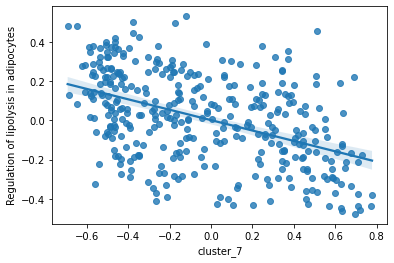

In [127]:
sns.regplot(out.loc['cluster_7'], out.loc['Regulation of lipolysis in adipocytes'])

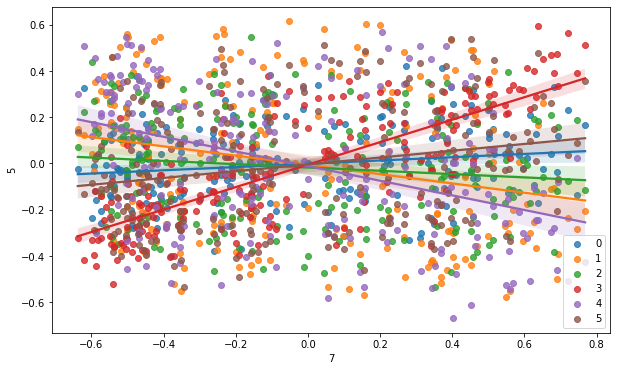

In [122]:
plt.figure(figsize=(10,6))
#sns.regplot(out.loc[7], out.loc[5])
for i in range(6):
    sns.regplot(out.loc[7], out.loc[i], label=i)
plt.legend()

<Axes: xlabel='7', ylabel='6'>

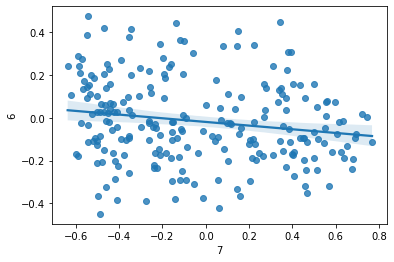

In [98]:
sns.regplot(out.loc[7], out.loc[6])


In [71]:
temp = out.T
temp['exp'] = np.array(meta['exp']<np.mean(meta['exp']))

In [102]:
temp['exp'] = np.array(out.loc[7]>np.mean(out.loc[7]))

<Axes: xlabel='exp', ylabel='3'>

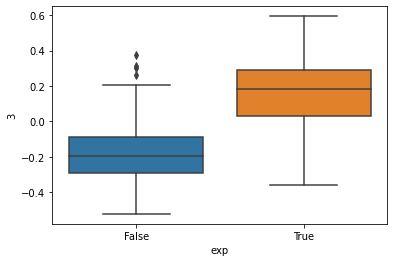

In [111]:
sns.boxplot(data=temp, x='exp', y=3)

<Axes: xlabel='exp', ylabel='2'>

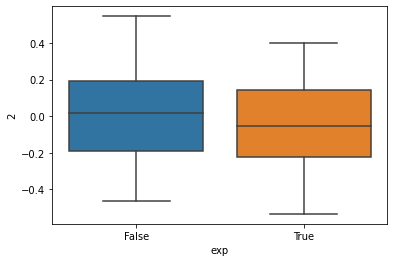

In [110]:
sns.boxplot(data=temp, x='exp', y=2)

In [84]:
temp.shape


(227, 9)

<Axes: xlabel='exp', ylabel='2'>

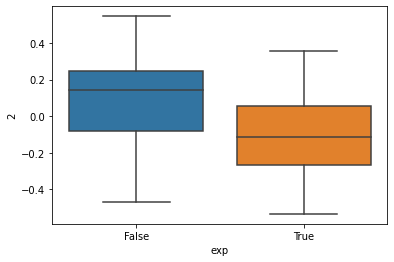

In [85]:
sns.boxplot(data=temp, x='exp', y=2)

<Axes: xlabel='exp', ylabel='1'>

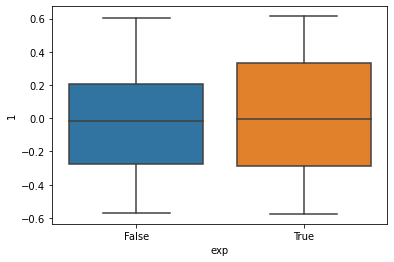

In [75]:
sns.boxplot(data=temp, x='exp', y=1)

In [68]:
temp

,2,5,4,0,1,6,7,3,exp
11409232,0.208189,0.261228,-0.298194,0.042707,-0.110589,-0.239991,0.673713,0.470271,NaN
11336574,-0.074255,0.034979,-0.507006,0.229311,-0.236314,0.019291,0.721329,0.565180,NaN
20207013,0.182697,0.477160,-0.244710,-0.171698,0.168007,-0.185407,0.636756,0.594063,NaN
10514454,0.186631,0.086883,0.025600,-0.134679,-0.283656,0.001741,0.745264,0.390692,NaN
10290265,0.340860,-0.284403,-0.022646,-0.210146,-0.251783,-0.221821,-0.240764,-0.021948,NaN
...,...,...,...,...,...,...,...,...,...
20500815,0.007761,0.060213,0.001482,0.256100,-0.300399,0.160358,0.402560,0.146774,NaN
51624179,-0.186096,0.444190,0.334371,0.199888,0.599889,-0.122310,0.199797,0.311020,NaN
22789958,0.072671,0.135583,0.301538,-0.024407,0.149753,0.242455,-0.637730,-0.321629,NaN
18659212,0.131044,0.041132,0.365643,0.033436,0.153462,0.211915,-0.582189,-0.332647,NaN


In [42]:
meta

,Row.names,X0,WGSid,projid,study,pmi,age_death,msex,amyloid,ceradsc,...,ABCA1,ABCA7,ATP8B4,TREM2,"colSums(df[var_info$LOF.y == 1, ])",rs3752246,seq_batch,apoe,rs3752246_binary,exp
11409232,11409232,SM-CJGIM,SM-CJGIM,11409232,ROS,1.333333,80.098563,1,0.000000,4,...,0,0,0,0,0,0,171013Tsa,0,0,NaN
11336574,11336574,SM-CTEGO,SM-CTEGO,11336574,ROS,3.500000,89.026694,1,7.365714,1,...,0,0,0,0,0,0,171013Tsa,1,0,NaN
20207013,20207013,SM-CJGLH,SM-CJGLH,20207013,ROS,4.166667,96.016427,0,0.000000,4,...,0,0,0,0,0,0,171013Tsa,0,0,NaN
10514454,10514454,SM-CJK5N,SM-CJK5N,10514454,ROS,16.750000,79.534565,1,0.000000,4,...,0,0,0,0,0,0,171013Tsa,0,0,NaN
10290265,10290265,SM-CTEM3,SM-CTEM3,10290265,ROS,20.483333,86.403833,1,2.878333,1,...,0,0,0,0,0,0,171013Tsa,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20500815,20500815,SM-CTDSF,SM-CTDSF,20500815,ROS,5.000000,90.297057,0,0.928125,2,...,0,0,0,0,0,0,last_16,0,0,NaN
51624179,51624179,SM-CTEIP,SM-CTEIP,51624179,MAP,8.250000,91.800137,0,11.892500,1,...,0,0,0,0,0,0,last_16,1,0,NaN
22789958,22789958,SM-CJJ1N,SM-CJJ1N,22789958,MAP,5.783333,99.164956,1,5.673333,2,...,0,0,0,0,0,0,last_16,0,0,NaN
18659212,18659212,SM-CJGI1,SM-CJGI1,18659212,MAP,6.800000,91.731691,1,1.741562,3,...,0,0,0,0,0,0,last_16,0,0,NaN


In [6]:
out.loc[2]

11409232    0.233722
11336574   -0.060074
20207013    0.181629
10514454    0.190301
10290265    0.349483
              ...   
22789958    0.066360
51520126    0.236712
94144536   -0.305342
18659212    0.130562
41285665    0.060204
Name: 2, Length: 360, dtype: float64

## below is scrap

In [32]:
np.log10(0.05)

-1.3010299956639813

<Axes: xlabel='score', ylabel='cluster'>

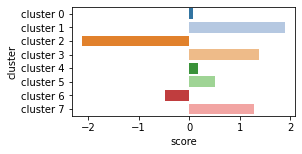

7    cluster 0
1    cluster 1
0    cluster 2
2    cluster 3
6    cluster 4
4    cluster 5
5    cluster 6
3    cluster 7
Name: cluster, dtype: object

['cluster 2',
 'cluster 1',
 'cluster 3',
 'cluster 7',
 'cluster 5',
 'cluster 6',
 'cluster 4',
 'cluster 0']

In [19]:
temp

,Unnamed: 0,pathway,pval,padj,log2err,ES,NES,size,score
0,1,2,0.007539,0.050774,0.274717,-0.521591,-1.666116,31,-2.122684
1,2,1,0.012693,0.050774,0.159153,0.517189,1.585338,38,1.896419
2,3,3,0.040667,0.106093,0.087357,0.456386,1.430772,43,1.390763
3,4,7,0.053047,0.106093,0.076608,0.455928,1.408364,40,1.275342
4,5,5,0.312539,0.451462,0.028688,0.358629,1.099306,38,0.505096
5,6,6,0.338596,0.451462,0.036511,-0.387688,-1.085840,18,-0.470318
6,7,4,0.668592,0.764105,0.017485,0.323588,0.862752,20,0.174839
7,8,0,0.835604,0.835604,0.013323,0.250252,0.767096,38,0.078000


In [ ]:
# show random control above & Holstege 

In [40]:
scores = pd.read_csv('../processed_data/single_cell/all_scores_0825.csv', index_col=0)


In [41]:
unique_clusters = np.unique(frame['cluster'])
cm = plt.cm.get_cmap('tab20')
colors = [cm(int(x)) for x in range(len(unique_clusters))]

/state/partition1/slurm_tmp/24464380.0.0/ipykernel_2659263/599630411.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('tab20')


/state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a futur

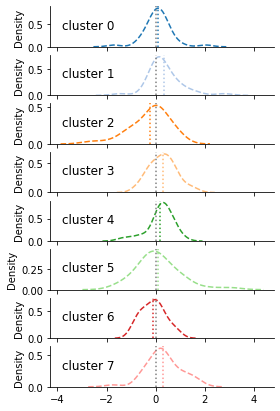

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

In [14]:
# plot score distributions per cluster
frame = pd.read_csv('../supplementary_tables/data_s8.csv')
scores = pd.read_csv('../processed_data/common_var/rs3752246_binary_scores.csv', index_col = 0)
frame = frame[[x in set(scores.index) for x in frame['description']]]

g_names  = np.array(frame['description'][frame['is_gene']])

SCORES = np.array(scores.loc[g_names]['scores'])

temp = [SCORES[frame['cluster'][frame['is_gene']]==i] for i in unique_clusters]
fig, axes = plt.subplots(8, 1, sharex=True, figsize=(4,7))

for i in range(len(temp)):
    plt.figure(figsize = (5,1))

    sns.distplot(temp[i], color=colors[i], kde=True,
        hist=None, label=str(i), ax=axes[i],  kde_kws={'linestyle':'--'});
    l1 = axes[i].lines[0]

    x1 = l1.get_xydata()[:, 0]
    y1 = l1.get_xydata()[:, 1]
    
    axes[i].spines[['right', 'top']].set_visible(False)
    axes[i].set_title('cluster '+str(i), loc='left', y=.3, x=.05)
    axes[i].axvline(np.mean(temp[i]), color=colors[i],linestyle='dotted')
    axes[i].axvline(0, color='grey', linestyle='dotted')
    #axes[i].fill_between(x1, y1, color='grey', alpha=0.3)

/state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a futur

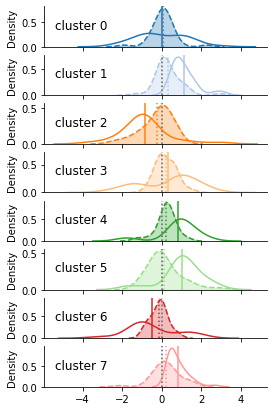

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

In [69]:
# plot score distributions per cluster
frame = pd.read_csv('../supplementary_tables/data_s8.csv')
scores = pd.read_csv('../processed_data/common_var/ex_scores.csv', index_col = 0)
frame = frame[[x in set(scores.index) for x in frame['description']]]

g_names  = np.array(frame['description'][frame['is_gene']])

SCORES = np.array(scores.loc[g_names]['scores'])

temp = [SCORES[frame['cluster'][frame['is_gene']]==i] for i in unique_clusters]
fig, axes = plt.subplots(8, 1, sharex=True, figsize=(4,7))

for i in range(len(temp)):
    plt.figure(figsize = (5,1))

    sns.distplot(temp[i], color=colors[i], kde=True,
        hist=None, label=str(i), ax=axes[i],  kde_kws={'linestyle':'--'});
    l1 = axes[i].lines[0]

    x1 = l1.get_xydata()[:, 0]
    y1 = l1.get_xydata()[:, 1]
    
    axes[i].spines[['right', 'top']].set_visible(False)
    axes[i].set_title('cluster '+str(i), loc='left', y=.3, x=.05)
    axes[i].axvline(np.mean(temp[i]), color=colors[i],linestyle='dotted')
    axes[i].axvline(0, color='grey', linestyle='dotted')
    #axes[i].fill_between(x1, y1, color='grey', alpha=0.3)

# plot score distributions per cluster
frame = pd.read_csv('../supplementary_tables/data_s8.csv')
scores = pd.read_csv('../processed_data/single_cell/all_scores_0825.csv', index_col=0)

g_names  = np.array(frame['description'][frame['is_gene']])

SCORES = np.array(scores.loc[g_names]['Ex'])

temp = [SCORES[frame['cluster'][frame['is_gene']]==i] for i in unique_clusters]

for i in range(len(temp)):
    #plt.figure(figsize = (5,1))

    sns.distplot(temp[i], color=colors[i], kde=True,
        hist=None, label=str(i), ax=axes[i]);
    l1 = axes[i].lines[0]

    x1 = l1.get_xydata()[:, 0]
    y1 = l1.get_xydata()[:, 1]
    
    axes[i].spines[['right', 'top']].set_visible(False)
    axes[i].set_title('cluster '+str(i), loc='left', y=.3, x=.05)
    axes[i].axvline(np.mean(temp[i]), color=colors[i])#, linestyle='dotted')
    axes[i].axvline(0, color='grey', linestyle='dotted')
    axes[i].fill_between(x1, y1, color=colors[i], alpha=0.3)


In [82]:
# plot score distributions per cluster
frame = pd.read_csv('../supplementary_tables/data_s8.csv')
scores = pd.read_csv('../processed_data/common_var/ex_scores.csv', index_col = 0)
frame = frame[[x in set(scores.index) for x in frame['description']]]

g_names  = np.array(frame['description'][frame['is_gene']])

SCORES = np.array(scores.loc[g_names]['scores'])

temp = [SCORES[frame['cluster'][frame['is_gene']]==i] for i in unique_clusters]

,scores,description,Unnamed: 0,cluster,is_gene,grp
0,2.947527,TOP3A,254,1,True,common
1,2.887574,SMC3,238,5,True,common
2,-2.415978,ESRRA,68,2,True,common
3,2.286346,OPRD1,155,0,True,common
4,-2.128037,NDUFA11,131,7,True,common


Text(0.1, 0.5, 'Scores')

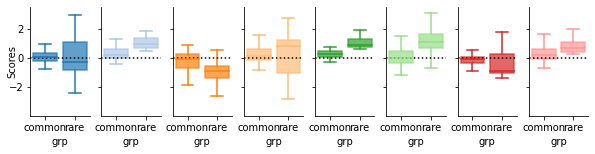

<Figure size 72x360 with 0 Axes>

<Figure size 72x360 with 0 Axes>

<Figure size 72x360 with 0 Axes>

<Figure size 72x360 with 0 Axes>

<Figure size 72x360 with 0 Axes>

<Figure size 72x360 with 0 Axes>

<Figure size 72x360 with 0 Axes>

<Figure size 72x360 with 0 Axes>

In [218]:
fig, axes = plt.subplots(1, 8, sharey=True, figsize=(10,2))

for i in np.unique(TEMP['cluster']):
    plt.figure(figsize = (1,5))
    temp = TEMP[TEMP['cluster']==i]
    boxplot = sns.boxplot(data = temp, x = 'grp', y='scores',color=colors[i], ax=axes[i],             boxprops=dict(alpha=.7,facecolor=colors[i], edgecolor=colors[i]), whiskerprops=dict(color=colors[i]),             medianprops=dict(color=colors[i]),
            capprops=dict(color=colors[i]),             flierprops=dict(markeredgecolor=colors[i], marker='.', markersize=0, markerfacecolor=colors[i], ))



    
    l1 = axes[i].lines[0]

    x1 = l1.get_xydata()[:, 0]
    y1 = l1.get_xydata()[:, 1]
    
    axes[i].spines[['right', 'top']].set_visible(False)
    #axes[i].set_title('cluster '+str(i), loc='left', y=.3, x=.05)
    #axes[i].axvline(np.mean(temp[i]), color=colors[i])#, linestyle='dotted')
    axes[i].axhline(0, color='black', linestyle='dotted')
    axes[i].fill_between(x1, y1, color=colors[i], alpha=0.3)
    axes[i].set_ylabel('')
# Add common title for the y-axis
fig.text(0.1, 0.5, 'Scores', ha='center', va='center', rotation='vertical')


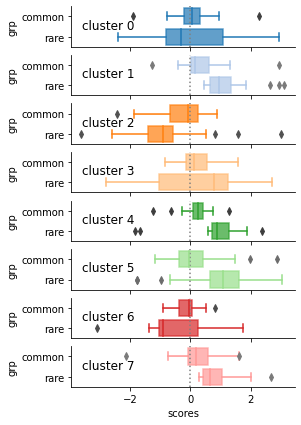

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

In [186]:
fig, axes = plt.subplots(8, 1, sharex=True, figsize=(4,7))

for i in np.unique(TEMP['cluster']):
    plt.figure(figsize = (5,1))
    temp = TEMP[TEMP['cluster']==i]
    boxplot = sns.boxplot(data = temp, y = 'grp', x='scores',color=colors[i], ax=axes[i],             boxprops=dict(alpha=.7,facecolor=colors[i], edgecolor=colors[i]), whiskerprops=dict(color=colors[i]),             medianprops=dict(color=colors[i]),
            capprops=dict(color=colors[i]))



    
    l1 = axes[i].lines[0]

    x1 = l1.get_xydata()[:, 0]
    y1 = l1.get_xydata()[:, 1]
    
    axes[i].spines[['right', 'top']].set_visible(False)
    axes[i].set_title('cluster '+str(i), loc='left', y=.3, x=.05)
    #axes[i].axvline(np.mean(temp[i]), color=colors[i])#, linestyle='dotted')
    axes[i].axvline(0, color='grey', linestyle='dotted')
    axes[i].fill_between(x1, y1, color=colors[i], alpha=0.3)


In [165]:
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274, 1.0),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 (1.0, 0.7333333333333333, 0.47058823529411764, 1.0),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353, 1.0),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
 (1.0, 0.596078431372549, 0.5882352941176471, 1.0)]

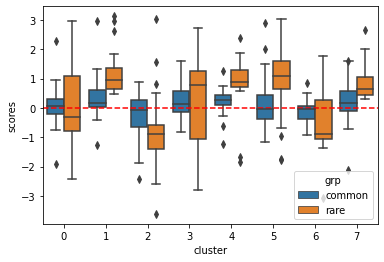

In [159]:
sns.boxplot(data=TEMP, x='cluster', y='scores', hue = 'grp')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Line')


In [129]:
scores = pd.read_csv('../processed_data/single_cell/all_scores_0825.csv', index_col=0)
scores = pd.DataFrame(scores['Ex'])

In [132]:
scores.colnames = 'test'

In [133]:
scores

,Ex
DTNBP1,-0.126932
VRK2,0.000000
ZBED5,2.611961
TMED3,1.281436
SEMA6B,0.077767
...,...
RNF152,0.000000
CYGB,0.000000
PNOC,0.000000
TMEM182,0.000000


In [116]:
temp2

,Ex,description,Unnamed: 0,cluster,is_gene,grp
0,2.326606,CDC7,40,5,True,rare
1,1.390363,PSMD11,188,3,True,rare
2,1.551225,MSH6,121,4,True,rare
3,1.584546,BARD1,25,1,True,rare
4,0.639716,WRN,267,1,True,rare
...,...,...,...,...,...,...
263,-1.553847,NR1H3,153,2,True,rare
264,-1.720019,RARA,202,2,True,rare
265,-1.781328,MAT2B,114,5,True,rare
266,-2.407135,CCKBR,38,0,True,rare


In [112]:
scores

,Ex
DTNBP1,-0.126932
VRK2,0.000000
ZBED5,2.611961
TMED3,1.281436
SEMA6B,0.077767
...,...
RNF152,0.000000
CYGB,0.000000
PNOC,0.000000
TMEM182,0.000000


,scores,description,Unnamed: 0,cluster,is_gene,grp
0,2.947527,TOP3A,254,1,True,common
1,2.887574,SMC3,238,5,True,common
2,-2.415978,ESRRA,68,2,True,common
3,2.286346,OPRD1,155,0,True,common
4,-2.128037,NDUFA11,131,7,True,common
...,...,...,...,...,...,...
261,0.007525,TOPBP1,255,1,True,common
262,-0.006909,ATRX,23,1,True,common
263,-0.005225,BID,28,6,True,common
264,0.003087,MSH6,121,4,True,common


In [99]:
temp

,scores,description,Unnamed: 0,cluster,is_gene,grp
0,2.947527,TOP3A,254,1,True,common
1,2.887574,SMC3,238,5,True,common
2,-2.415978,ESRRA,68,2,True,common
3,2.286346,OPRD1,155,0,True,common
4,-2.128037,NDUFA11,131,7,True,common
...,...,...,...,...,...,...
261,0.007525,TOPBP1,255,1,True,common
262,-0.006909,ATRX,23,1,True,common
263,-0.005225,BID,28,6,True,common
264,0.003087,MSH6,121,4,True,common


In [91]:
pd.merge

<function pandas.core.reshape.merge.merge(left: 'DataFrame | Series', right: 'DataFrame | Series', how: 'str' = 'inner', on: 'IndexLabel | None' = None, left_on: 'IndexLabel | None' = None, right_on: 'IndexLabel | None' = None, left_index: 'bool' = False, right_index: 'bool' = False, sort: 'bool' = False, suffixes: 'Suffixes' = ('_x', '_y'), copy: 'bool' = True, indicator: 'bool' = False, validate: 'str | None' = None) -> 'DataFrame'>

/state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments witho

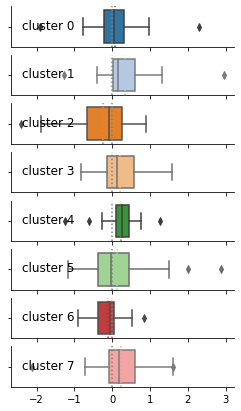

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

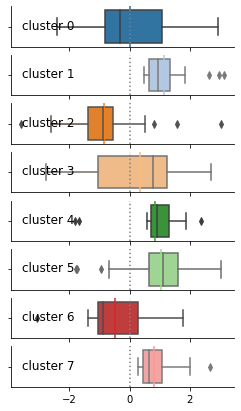

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

In [81]:
# plot score distributions per cluster
frame = pd.read_csv('../supplementary_tables/data_s8.csv')
scores = pd.read_csv('../processed_data/common_var/ex_scores.csv', index_col = 0)
frame = frame[[x in set(scores.index) for x in frame['description']]]

g_names  = np.array(frame['description'][frame['is_gene']])

SCORES = np.array(scores.loc[g_names]['scores'])

temp = [SCORES[frame['cluster'][frame['is_gene']]==i] for i in unique_clusters]
fig, axes = plt.subplots(8, 1, sharex=True, figsize=(4,7))

for i in range(len(temp)):
    plt.figure(figsize = (5,1))

    sns.boxplot(temp[i], color=colors[i], ax=axes[i])
    l1 = axes[i].lines[0]

    x1 = l1.get_xydata()[:, 0]
    y1 = l1.get_xydata()[:, 1]
    
    axes[i].spines[['right', 'top']].set_visible(False)
    axes[i].set_title('cluster '+str(i), loc='left', y=.3, x=.05)
    axes[i].axvline(np.mean(temp[i]), color=colors[i],linestyle='dotted')
    axes[i].axvline(0, color='grey', linestyle='dotted')
    #axes[i].fill_between(x1, y1, color='grey', alpha=0.3)

# plot score distributions per cluster
frame = pd.read_csv('../supplementary_tables/data_s8.csv')
scores = pd.read_csv('../processed_data/single_cell/all_scores_0825.csv', index_col=0)

g_names  = np.array(frame['description'][frame['is_gene']])

SCORES = np.array(scores.loc[g_names]['Ex'])

temp = [SCORES[frame['cluster'][frame['is_gene']]==i] for i in unique_clusters]
fig, axes = plt.subplots(8, 1, sharex=True, figsize=(4,7))

for i in range(len(temp)):
    plt.figure(figsize = (5,1))

    sns.boxplot(temp[i], color=colors[i], ax=axes[i])
    l1 = axes[i].lines[0]

    x1 = l1.get_xydata()[:, 0]
    y1 = l1.get_xydata()[:, 1]
    
    axes[i].spines[['right', 'top']].set_visible(False)
    axes[i].set_title('cluster '+str(i), loc='left', y=.3, x=.05)
    axes[i].axvline(np.mean(temp[i]), color=colors[i])#, linestyle='dotted')
    axes[i].axvline(0, color='grey', linestyle='dotted')
    axes[i].fill_between(x1, y1, color=colors[i], alpha=0.3)


In [ ]:

# plot score distributions per cluster
frame = pd.read_csv('../supplementary_tables/data_s8.csv')
scores = pd.read_csv('../processed_data/single_cell/all_scores_0825.csv', index_col=0)

g_names  = np.array(frame['description'][frame['is_gene']])

SCORES = np.array(scores.loc[g_names]['Ex'])

temp = [SCORES[frame['cluster'][frame['is_gene']]==i] for i in unique_clusters]

for i in range(len(temp)):
    #plt.figure(figsize = (5,1))

    sns.distplot(temp[i], color=colors[i], kde=True,
        hist=None, label=str(i), ax=axes[i]);
    l1 = axes[i].lines[0]

    x1 = l1.get_xydata()[:, 0]
    y1 = l1.get_xydata()[:, 1]
    
    axes[i].spines[['right', 'top']].set_visible(False)
    axes[i].set_title('cluster '+str(i), loc='left', y=.3, x=.05)
    axes[i].axvline(np.mean(temp[i]), color=colors[i])#, linestyle='dotted')
    axes[i].axvline(0, color='grey', linestyle='dotted')
    axes[i].fill_between(x1, y1, color=colors[i], alpha=0.3)
